# Оптимизация

Подмодуль [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize) содержит в себе множество методов для решения задач оптимизации (минимизация, максимизация).

## Минимизация скалярной функции одного аргумента

Функция [scipy.optimize.minimize_scalar](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar) позволяет минимизировать функцию $f: \mathbb{R} \to \mathbb{R}$:

$$
\min_{x \in D} f(x).
$$

     fun: -9.914949590828147
    nfev: 15
     nit: 11
 success: True
       x: 1.2807764040333458


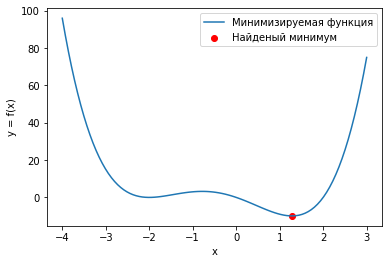

In [2]:
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt


def f(x):
    return (x - 2) * x * (x + 2)**2


sol = optimize.minimize_scalar(f)
print(sol)


x = np.linspace(-4, 3, 100)
plt.plot(x, f(x))
plt.scatter(sol.x, f(sol.x), color="r")
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.legend(["Минимизируемая функция", "Найденный минимум"])

У функции $f(x) = (x - 1)x(x + 2)^2$ два локальных минимума и функция `minimize_scalar` вернула из них глобальный. Можно сузить поиск область поиска минимума используя метод `bounded`.

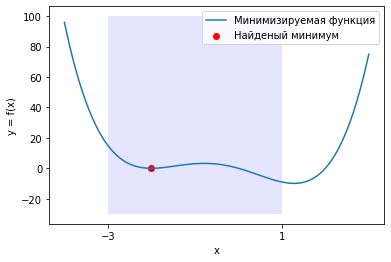

In [3]:
a, b = -3, 1
sol = optimize.minimize_scalar(f, bounds=(a, b), method="bounded")

plt.plot(x, f(x))
plt.scatter(sol.x, f(sol.x), color="r")
plt.xticks([a, b])
upper = np.array([100, 100])
lower = np.array([-30, -30])
plt.fill_between([a, b], lower, upper, where=upper>0, facecolor='blue', alpha=0.10)
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.legend(["Минимизируемая функция", "Найденный минимум"])

## Минимизация функции многих переменных

Функция [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) предназначена для минимизации функции многих переменных. Рассмотрим её на примере [функции Розенброка](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%A0%D0%BE%D0%B7%D0%B5%D0%BD%D0%B1%D1%80%D0%BE%D0%BA%D0%B0)

$$
f(x_1, x_2) = (1 - x_1)^2 + 100(1-x_2)^2.
$$

Её минимум равен 0 при $x_1 = 1$ и $x_2 = 1$. Эта функция часто применяется для тестирования алгоритмов оптимизации и поэтому присутствует в `SciPy` под именем [scipy.optimize.rosen](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.rosen.html#scipy.optimize.rosen).


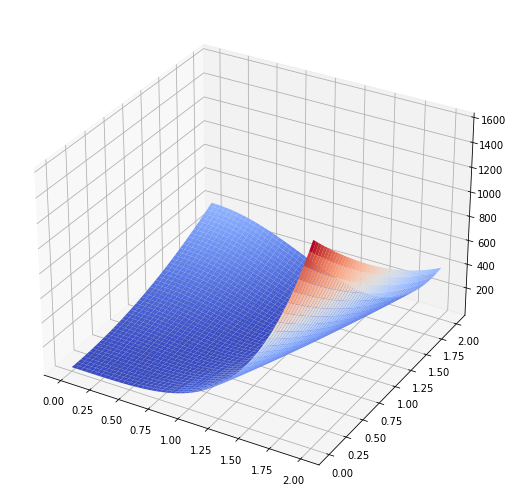

In [62]:
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

f = optimize.rosen
jac = optimize.rosen_der
hess = optimize.rosen_hess


x = np.linspace(0, 2, 200)
X, Y = np.meshgrid(x, x)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_size_inches((10, 9))
ax.plot_surface(X, Y, f([X, Y]), cmap="coolwarm")
plt.show()
    

      fun: 1.8932820837847567e-11
 hess_inv: array([[0.51676073, 1.03186646],
       [1.03186646, 2.06557555]])
      jac: array([ 5.27409301e-06, -2.50588723e-06])
  message: 'Optimization terminated successfully.'
     nfev: 105
      nit: 30
     njev: 35
   status: 0
  success: True
        x: array([0.99999565, 0.99999129])


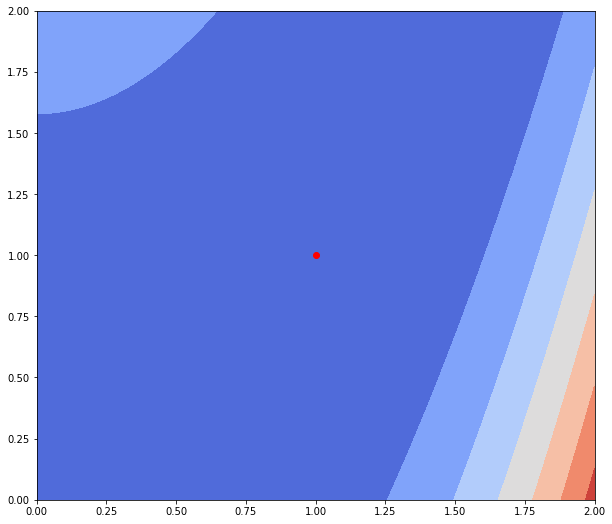

In [63]:
res = optimize.minimize(f, [2, 2])
print(res)

fig, ax = plt.subplots()
fig.set_size_inches((10, 9))
ax.contourf(X, Y, f([X, Y]), cmap="coolwarm")
ax.scatter(res.x[0], res.x[1], color="r")
plt.show()

Как видно из сообщения, метод успешно сошелся и алгоритму потребовалось 30 итераций и 105 вызовов функции `f`, чтобы сойтись. Передадим этому методу функцию, вычисляющую матрицу градиент искомой функции.

In [64]:
res = optimize.minimize(f, [2, 2], jac=jac)
res


      fun: 3.271435067604758e-14
 hess_inv: array([[0.51671918, 1.03179112],
       [1.03179112, 2.06544014]])
      jac: array([ 5.26067293e-06, -2.49959031e-06])
  message: 'Optimization terminated successfully.'
     nfev: 35
      nit: 30
     njev: 35
   status: 0
  success: True
        x: array([1.00000013, 1.00000025])

Количество вызовов функции снизилось до 35, но количество итераций осталось прежним. Это достигается за счет того, что метод минимизации вычисляет производную, вызывая переданную функцию `jac`, а до этого он её оценивал численно, что требовало дополнительных вызовов `f`. 

Передадим ещё информацию о второй производной функции `f`, т.е. матрицу Гессе. Метод минимизации по умолчанию (`BFGS`) --- метод первого порядка, чтобы задействовать матрицу Гессе, необходимо использовать метод второго порядка, например, `dogleg`

In [65]:
res = optimize.minimize(f, [2, 2], jac=optimize.rosen_der, hess=optimize.rosen_hess,  method="dogleg")
print(res)

     fun: 7.335116582097013e-13
    hess: array([[ 802.00135535, -400.00033735],
       [-400.00033735,  200.        ]])
     jac: array([ 7.65326055e-06, -2.98326426e-06])
 message: 'Optimization terminated successfully.'
    nfev: 16
    nhev: 13
     nit: 15
    njev: 14
  status: 0
 success: True
       x: array([1.00000084, 1.00000167])


Методу второго порядка потребовалось всего 15 итераций и 16 вызовов функции `f`, чтобы сойтись.